In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import random
# Use Hongjin Zhu's N number
random.seed(11993511)
np.random.seed(11993511)

In [3]:
file_url = 'https://raw.githubusercontent.com/HongjinZhu/IDS-Capstone-Project/main/spotify52kData.csv'
df = pd.read_csv(file_url)
df

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,-6.707,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop
51996,51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop


In [4]:
from scipy.stats import spearmanr

# we do not assume linearity, use spearman correlation
correlation, p_value = spearmanr(df['popularity'], df['duration'])

print(f"Correlation between 'popularity' and 'duration': {correlation}")
print(f"P-value: {p_value}")

Correlation between 'popularity' and 'duration': -0.03728567620648788
P-value: 1.8129032751448625e-17


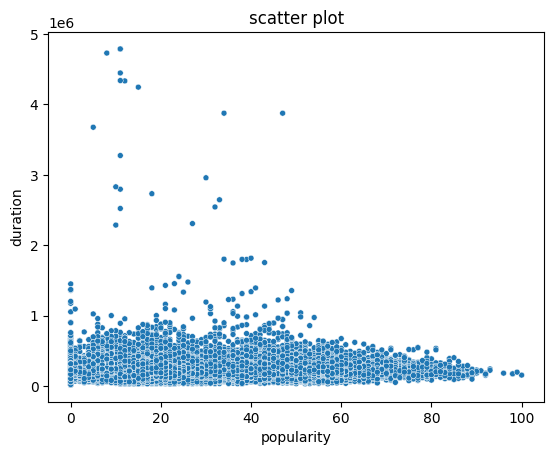

In [7]:
sns.scatterplot(x=df['popularity'].values, y=df['duration'].values, size=2, legend=None)
plt.title('scatter plot')
plt.xlabel('popularity')
plt.ylabel('duration')
plt.show()

set alpha = 0.005, we see that p-value is less than alpha, so we reject the null hypothesis. Hence, we can conclude that there is a negative correlation between 'popularity' and 'duration'.

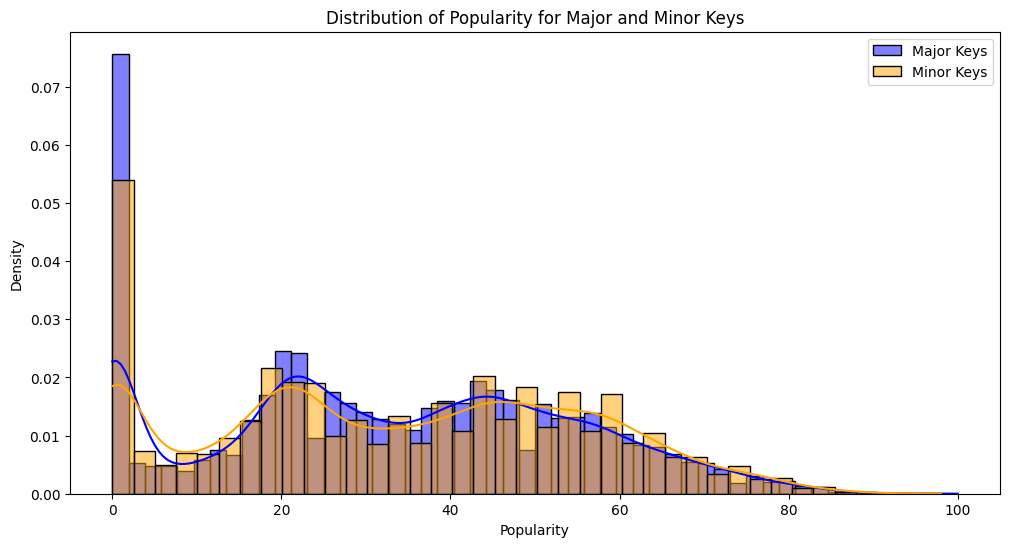

In [8]:
from scipy.stats import norm

major_keys = df[df['mode'] == 1]['popularity']
minor_keys = df[df['mode'] == 0]['popularity']

plt.figure(figsize=(12, 6))
sns.histplot(major_keys, kde=True, label='Major Keys', color='blue', stat='density')
sns.histplot(minor_keys, kde=True, label='Minor Keys', color='orange', stat='density')

plt.title('Distribution of Popularity for Major and Minor Keys')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.legend()
plt.show()

In [9]:
from scipy.stats import ttest_ind

# considering heterogeneity of variances, use Welch's t-test
statistic, p_value = ttest_ind(major_keys, minor_keys, alternative='greater', equal_var=False)
print(f"p-value: {p_value/2}")

p-value: 0.4999995847271736


Here, p-value is greater than alpha, so we fail to reject the null hypothesis. Hence, we cannot conclude that major keys have a higher popularity than minor keys.